In [1]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
f1 = open(r"2020_Weekend1_Problems\2020_Problem_D_DATA\fullevents.csv")
f2 = open(r"2020_Weekend1_Problems\2020_Problem_D_DATA\passingevents.csv")
f3 = open(r"2020_Weekend1_Problems\2020_Problem_D_DATA\matches.csv")

data_pass = pd.read_csv(f2)
data_full = pd.read_csv(f1)
data_match = pd.read_csv(f3)

In [4]:
data_pass

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Head pass,34,97,59.0,95.0
1,1,Huskies,Huskies_M1,Huskies_F2,1H,51.022546,Simple pass,53,89,69.0,91.0
2,1,Opponent1,Opponent1_D2,Opponent1_G1,1H,89.008721,Simple pass,19,16,5.0,50.0
3,1,Opponent1,Opponent1_G1,Opponent1_F1,1H,92.216160,Launch,5,50,67.0,44.0
4,1,Huskies,Huskies_M2,Huskies_M3,1H,98.265191,Simple pass,42,55,36.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...
23424,38,Opponent14,Opponent14_M3,Opponent14_D1,2H,2758.973892,Simple pass,57,56,65.0,63.0
23425,38,Opponent14,Opponent14_D1,Opponent14_D6,2H,2760.286946,Simple pass,65,63,61.0,96.0
23426,38,Opponent14,Opponent14_D6,Opponent14_M4,2H,2763.698599,Simple pass,61,96,40.0,85.0
23427,38,Opponent14,Opponent14_M4,Opponent14_M2,2H,2783.137836,Simple pass,59,70,53.0,89.0


In [5]:
data_full

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_G1,NaN,1H,31.174681,Free Kick,Goal kick,0.0,0.0,66.0,89.0
1,1,Opponent1,Opponent1_D1,NaN,1H,33.730326,Duel,Air duel,34.0,11.0,22.0,0.0
2,1,Huskies,Huskies_F1,NaN,1H,33.812965,Duel,Air duel,66.0,89.0,78.0,100.0
3,1,Opponent1,Opponent1_D2,NaN,1H,42.611028,Free Kick,Throw in,22.0,0.0,66.0,3.0
4,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Pass,Head pass,34.0,97.0,59.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...
59266,38,Huskies,Huskies_D4,NaN,2H,2790.457942,Others on the ball,Touch,2.0,31.0,0.0,32.0
59267,38,Opponent14,Opponent14_M5,NaN,2H,2829.821084,Free Kick,Corner,100.0,100.0,88.0,47.0
59268,38,Huskies,Huskies_D1,NaN,2H,2831.211419,Duel,Air duel,12.0,53.0,14.0,50.0
59269,38,Opponent14,Opponent14_D7,NaN,2H,2832.434399,Duel,Air duel,88.0,47.0,86.0,50.0


In [6]:
data_match

,MatchID,OpponentID,Outcome,OwnScore,OpponentScore,Side,CoachID
0,1,Opponent1,win,1,0,home,Coach1
1,2,Opponent2,tie,1,1,away,Coach1
2,3,Opponent3,loss,0,2,away,Coach1
3,4,Opponent4,loss,0,3,home,Coach1
4,5,Opponent5,loss,0,4,away,Coach1
5,6,Opponent6,win,2,1,home,Coach1
6,7,Opponent7,loss,0,1,home,Coach1
7,8,Opponent8,tie,1,1,away,Coach1
8,9,Opponent9,loss,2,5,home,Coach1
9,10,Opponent10,loss,0,2,away,Coach2


# 对data_full进行初步观察  
**总共59271行**  
*以下为有缺失的数据*  
DestinationPlayerID    23644 non-null object  
EventSubType           59131 non-null object  
EventOrigin_x          59056 non-null float64  
EventOrigin_y          59056 non-null float64  
EventDestination_x     59047 non-null float64  
EventDestination_y     59047 non-null float64  

In [7]:
data_full.info()
data_full.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59271 entries, 0 to 59270
Data columns (total 12 columns):
MatchID                59271 non-null int64
TeamID                 59271 non-null object
OriginPlayerID         59271 non-null object
DestinationPlayerID    23644 non-null object
MatchPeriod            59271 non-null object
EventTime              59271 non-null float64
EventType              59271 non-null object
EventSubType           59131 non-null object
EventOrigin_x          59056 non-null float64
EventOrigin_y          59056 non-null float64
EventDestination_x     59047 non-null float64
EventDestination_y     59047 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 5.4+ MB


,MatchID,EventTime,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
count,59271.000000,59271.000000,59056.000000,59056.000000,59047.000000,59047.000000
mean,19.409543,1402.089559,49.166842,49.612842,52.838417,49.586177
std,10.908527,836.575554,25.025017,30.406239,25.343200,30.843869
min,1.000000,0.111465,0.000000,0.000000,0.000000,0.000000
25%,10.000000,672.527091,30.000000,23.000000,33.000000,22.000000
50%,19.000000,1382.232580,48.000000,49.000000,56.000000,49.000000
75%,29.000000,2111.714218,69.000000,77.000000,72.000000,77.000000
max,38.000000,3476.779012,100.000000,100.000000,100.000000,100.000000


查看空值

In [8]:
data_full[data_full.isnull().T.any()]
# data_full[data_full.isnull().T.any()]['EventSubType'].value_counts()

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_G1,NaN,1H,31.174681,Free Kick,Goal kick,0.0,0.0,66.0,89.0
1,1,Opponent1,Opponent1_D1,NaN,1H,33.730326,Duel,Air duel,34.0,11.0,22.0,0.0
2,1,Huskies,Huskies_F1,NaN,1H,33.812965,Duel,Air duel,66.0,89.0,78.0,100.0
3,1,Opponent1,Opponent1_D2,NaN,1H,42.611028,Free Kick,Throw in,22.0,0.0,66.0,3.0
5,1,Huskies,Huskies_F1,NaN,1H,47.004714,Duel,Ground loose ball duel,59.0,95.0,64.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...
59266,38,Huskies,Huskies_D4,NaN,2H,2790.457942,Others on the ball,Touch,2.0,31.0,0.0,32.0
59267,38,Opponent14,Opponent14_M5,NaN,2H,2829.821084,Free Kick,Corner,100.0,100.0,88.0,47.0
59268,38,Huskies,Huskies_D1,NaN,2H,2831.211419,Duel,Air duel,12.0,53.0,14.0,50.0
59269,38,Opponent14,Opponent14_D7,NaN,2H,2832.434399,Duel,Air duel,88.0,47.0,86.0,50.0


In [16]:
data_full['EventSubType'].value_counts()
data_full['EventSubType'][data_full.EventType == 'Others on the ball'].value_counts()

Touch           3409
Clearance       1218
Acceleration     443
Name: EventSubType, dtype: int64

In [10]:
data_full.loc[data_full['EventSubType']=='Penalty']

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
7816,5,Opponent5,Opponent5_F3,NaN,2H,2798.827886,Free Kick,Penalty,89.0,49.0,88.0,37.0
12366,8,Huskies,Huskies_F2,NaN,2H,2650.847124,Free Kick,Penalty,89.0,50.0,92.0,43.0
16971,11,Huskies,Huskies_D4,NaN,2H,2755.065901,Free Kick,Penalty,90.0,50.0,92.0,73.0
17113,11,Opponent11,Opponent11_M1,NaN,2H,3307.255167,Free Kick,Penalty,89.0,50.0,94.0,49.0
17243,12,Huskies,Huskies_D4,NaN,1H,325.271510,Free Kick,Penalty,89.0,50.0,88.0,34.0
20717,14,Huskies,Huskies_F2,NaN,1H,1052.339819,Free Kick,Penalty,89.0,50.0,87.0,54.0
21472,14,Opponent14,Opponent14_M1,NaN,2H,817.950608,Free Kick,Penalty,90.0,51.0,90.0,47.0
24882,16,Huskies,Huskies_F2,NaN,2H,1881.520925,Free Kick,Penalty,89.0,51.0,90.0,30.0
27513,18,Huskies,Huskies_F2,NaN,1H,2776.931841,Free Kick,Penalty,90.0,51.0,89.0,71.0
27921,18,Huskies,Huskies_F2,NaN,2H,1679.468433,Free Kick,Penalty,89.0,49.0,86.0,66.0


# 选取MatchID=1的比赛进行分析

In [10]:
data_full1 = data_full.loc[data_full['MatchID'] == 1]
data_full1

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_G1,NaN,1H,31.174681,Free Kick,Goal kick,0.0,0.0,66.0,89.0
1,1,Opponent1,Opponent1_D1,NaN,1H,33.730326,Duel,Air duel,34.0,11.0,22.0,0.0
2,1,Huskies,Huskies_F1,NaN,1H,33.812965,Duel,Air duel,66.0,89.0,78.0,100.0
3,1,Opponent1,Opponent1_D2,NaN,1H,42.611028,Free Kick,Throw in,22.0,0.0,66.0,3.0
4,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Pass,Head pass,34.0,97.0,59.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1516,1,Opponent1,Opponent1_M1,NaN,2H,2891.023764,Duel,Ground loose ball duel,71.0,64.0,72.0,62.0
1517,1,Huskies,Huskies_M1,NaN,2H,2891.023764,Duel,Ground loose ball duel,29.0,36.0,28.0,38.0
1518,1,Opponent1,Opponent1_M1,NaN,2H,2894.702719,Foul,Foul,72.0,62.0,71.0,64.0
1519,1,Huskies,Huskies_G1,NaN,2H,2934.944737,Free Kick,Free Kick,21.0,38.0,83.0,0.0


In [33]:
data_full1[(data_full1.EventSubType == 'Reflexes')]

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
726,1,Opponent1,Opponent1_G1,NaN,1H,2716.210598,Save attempt,Reflexes,100.0,100.0,6.0,51.0
1146,1,Opponent1,Opponent1_G1,NaN,2H,1403.223032,Save attempt,Reflexes,100.0,100.0,8.0,69.0


In [38]:
data_full['EventSubType'][(data_full.EventType == 'Shot')].value_counts()

Shot    820
Name: EventSubType, dtype: int64

In [39]:
data_full1['EventSubType'].value_counts()
data_full1[(data_full1.EventType == 'Shot')]
data_full1[(data_full1.EventType == 'Shot') & (data_full1.EventDestination_x == 0) & (data_full1.EventDestination_y == 0)]

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
204,1,Huskies,Huskies_F3,NaN,1H,725.762958,Shot,Shot,83.0,45.0,0.0,0.0
344,1,Huskies,Huskies_M1,NaN,1H,1190.187435,Shot,Shot,79.0,72.0,0.0,0.0
402,1,Huskies,Huskies_M1,NaN,1H,1430.877737,Shot,Shot,83.0,59.0,0.0,0.0
725,1,Huskies,Huskies_F2,NaN,1H,2714.265932,Shot,Shot,94.0,49.0,0.0,0.0
876,1,Huskies,Huskies_F1,NaN,2H,507.559438,Shot,Shot,89.0,63.0,0.0,0.0
1021,1,Huskies,Huskies_F1,NaN,2H,973.996866,Shot,Shot,90.0,52.0,0.0,0.0
1145,1,Huskies,Huskies_F1,NaN,2H,1401.088454,Shot,Shot,92.0,31.0,0.0,0.0
1197,1,Huskies,Huskies_F3,NaN,2H,1685.252638,Shot,Shot,82.0,35.0,0.0,0.0


# 坐标转化

In [16]:
data_full1.loc[data_full1.TeamID == 'Opponent1','EventOrigin_x']  = data_full1.loc[data_full1.TeamID == 'Opponent1','EventOrigin_x'].map(lambda x: 100-x)

D:\anaconda\envs\python3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


查看原本的值

In [19]:
data_full1

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_G1,NaN,1H,31.174681,Free Kick,Goal kick,0.0,0.0,66.0,89.0
1,1,Opponent1,Opponent1_D1,NaN,1H,33.730326,Duel,Air duel,34.0,11.0,22.0,0.0
2,1,Huskies,Huskies_F1,NaN,1H,33.812965,Duel,Air duel,66.0,89.0,78.0,100.0
3,1,Opponent1,Opponent1_D2,NaN,1H,42.611028,Free Kick,Throw in,22.0,0.0,66.0,3.0
4,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Pass,Head pass,34.0,97.0,59.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1516,1,Opponent1,Opponent1_M1,NaN,2H,2891.023764,Duel,Ground loose ball duel,71.0,64.0,72.0,62.0
1517,1,Huskies,Huskies_M1,NaN,2H,2891.023764,Duel,Ground loose ball duel,29.0,36.0,28.0,38.0
1518,1,Opponent1,Opponent1_M1,NaN,2H,2894.702719,Foul,Foul,72.0,62.0,71.0,64.0
1519,1,Huskies,Huskies_G1,NaN,2H,2934.944737,Free Kick,Free Kick,21.0,38.0,83.0,0.0


查看修改后的值

In [23]:
data_full1

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_G1,NaN,1H,31.174681,Free Kick,Goal kick,0.0,0.0,66.0,89.0
1,1,Opponent1,Opponent1_D1,NaN,1H,33.730326,Duel,Air duel,66.0,11.0,22.0,0.0
2,1,Huskies,Huskies_F1,NaN,1H,33.812965,Duel,Air duel,66.0,89.0,78.0,100.0
3,1,Opponent1,Opponent1_D2,NaN,1H,42.611028,Free Kick,Throw in,78.0,0.0,66.0,3.0
4,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Pass,Head pass,34.0,97.0,59.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1516,1,Opponent1,Opponent1_M1,NaN,2H,2891.023764,Duel,Ground loose ball duel,29.0,64.0,72.0,62.0
1517,1,Huskies,Huskies_M1,NaN,2H,2891.023764,Duel,Ground loose ball duel,29.0,36.0,28.0,38.0
1518,1,Opponent1,Opponent1_M1,NaN,2H,2894.702719,Foul,Foul,28.0,62.0,71.0,64.0
1519,1,Huskies,Huskies_G1,NaN,2H,2934.944737,Free Kick,Free Kick,21.0,38.0,83.0,0.0


一并修改其他3列

In [24]:
data_full1.loc[data_full1.TeamID == 'Opponent1','EventOrigin_y']  = data_full1.loc[data_full1.TeamID == 'Opponent1','EventOrigin_y'].map(lambda x: 100-x)
data_full1.loc[data_full1.TeamID == 'Opponent1','EventDestination_x']  = data_full1.loc[data_full1.TeamID == 'Opponent1','EventDestination_x'].map(lambda x: 100-x)
data_full1.loc[data_full1.TeamID == 'Opponent1','EventDestination_y']  = data_full1.loc[data_full1.TeamID == 'Opponent1','EventDestination_y'].map(lambda x: 100-x)

再次查看

In [27]:
data_full1

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_G1,NaN,1H,31.174681,Free Kick,Goal kick,0.0,0.0,66.0,89.0
1,1,Opponent1,Opponent1_D1,NaN,1H,33.730326,Duel,Air duel,66.0,89.0,78.0,100.0
2,1,Huskies,Huskies_F1,NaN,1H,33.812965,Duel,Air duel,66.0,89.0,78.0,100.0
3,1,Opponent1,Opponent1_D2,NaN,1H,42.611028,Free Kick,Throw in,78.0,100.0,34.0,97.0
4,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Pass,Head pass,34.0,97.0,59.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1516,1,Opponent1,Opponent1_M1,NaN,2H,2891.023764,Duel,Ground loose ball duel,29.0,36.0,28.0,38.0
1517,1,Huskies,Huskies_M1,NaN,2H,2891.023764,Duel,Ground loose ball duel,29.0,36.0,28.0,38.0
1518,1,Opponent1,Opponent1_M1,NaN,2H,2894.702719,Foul,Foul,28.0,38.0,29.0,36.0
1519,1,Huskies,Huskies_G1,NaN,2H,2934.944737,Free Kick,Free Kick,21.0,38.0,83.0,0.0


In [36]:
# 按比例缩放
data_full1.loc[data_full1.TeamID == 'Opponent1', ['EventOrigin_x','EventDestination_x']].apply(lambda x:  x/1.2)

AttributeError: module 'pandas' has no attribute 'readcsv'

In [33]:
data_full1

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_G1,NaN,1H,31.174681,Free Kick,Goal kick,0.0,0.0,66.0,89.0
1,1,Opponent1,Opponent1_D1,NaN,1H,33.730326,Duel,Air duel,66.0,106.8,93.6,100.0
2,1,Huskies,Huskies_F1,NaN,1H,33.812965,Duel,Air duel,66.0,89.0,78.0,100.0
3,1,Opponent1,Opponent1_D2,NaN,1H,42.611028,Free Kick,Throw in,78.0,120.0,40.8,97.0
4,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Pass,Head pass,34.0,97.0,59.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1516,1,Opponent1,Opponent1_M1,NaN,2H,2891.023764,Duel,Ground loose ball duel,29.0,43.2,33.6,38.0
1517,1,Huskies,Huskies_M1,NaN,2H,2891.023764,Duel,Ground loose ball duel,29.0,36.0,28.0,38.0
1518,1,Opponent1,Opponent1_M1,NaN,2H,2894.702719,Foul,Foul,28.0,45.6,34.8,36.0
1519,1,Huskies,Huskies_G1,NaN,2H,2934.944737,Free Kick,Free Kick,21.0,38.0,83.0,0.0


# 选取ID = 4的比赛
分析3次进球  
分别时间为  
24  
2478.424573  


In [40]:
data_full4 = data_full.loc[data_full['MatchID'] == 4]
data_full4

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
4598,4,Opponent4,Opponent4_M1,Opponent4_D1,1H,1.121642,Pass,Simple pass,50.0,51.0,26.0,27.0
4599,4,Opponent4,Opponent4_D1,Opponent4_D2,1H,2.972737,Pass,Simple pass,26.0,27.0,25.0,51.0
4600,4,Opponent4,Opponent4_D2,Opponent4_D3,1H,5.563289,Pass,Simple pass,25.0,51.0,23.0,79.0
4601,4,Opponent4,Opponent4_D3,Opponent4_D4,1H,8.062656,Pass,Simple pass,23.0,79.0,26.0,96.0
4602,4,Opponent4,Opponent4_D4,Opponent4_D3,1H,10.918924,Pass,Simple pass,26.0,96.0,24.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6214,4,Opponent4,Opponent4_M6,Opponent4_M5,2H,2912.296992,Pass,Simple pass,81.0,26.0,78.0,39.0
6215,4,Opponent4,Opponent4_M5,Opponent4_D4,2H,2914.567598,Pass,Simple pass,78.0,39.0,81.0,83.0
6216,4,Opponent4,Opponent4_D4,Opponent4_F2,2H,2917.826816,Pass,Cross,81.0,83.0,93.0,48.0
6217,4,Opponent4,Opponent4_F2,NaN,2H,2919.476980,Offside,NaN,93.0,48.0,100.0,100.0


In [45]:
data_full4[(data_full4.EventType == 'Shot') & (data_full4.EventDestination_x == 100) & (data_full4.EventDestination_y == 100)]
data_full4[(data_full4.EventType == 'Shot')]

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
4726,4,Huskies,Huskies_F3,NaN,1H,357.604726,Shot,Shot,91.0,56.0,0.0,0.0
4733,4,Opponent4,Opponent4_M1,NaN,1H,389.854103,Shot,Shot,84.0,40.0,100.0,100.0
4809,4,Opponent4,Opponent4_M1,NaN,1H,703.621502,Shot,Shot,86.0,49.0,100.0,100.0
4842,4,Opponent4,Opponent4_M2,NaN,1H,895.186852,Shot,Shot,89.0,47.0,100.0,100.0
4845,4,Opponent4,Opponent4_F1,NaN,1H,901.474183,Shot,Shot,97.0,44.0,100.0,100.0
4925,4,Huskies,Huskies_M6,NaN,1H,1203.079525,Shot,Shot,83.0,42.0,0.0,0.0
5040,4,Opponent4,Opponent4_F1,NaN,1H,1664.160104,Shot,Shot,79.0,85.0,100.0,100.0
5070,4,Huskies,Huskies_F3,NaN,1H,1826.157444,Shot,Shot,85.0,42.0,0.0,0.0
5250,4,Opponent4,Opponent4_D5,NaN,1H,2476.710309,Shot,Shot,94.0,34.0,100.0,100.0
5252,4,Opponent4,Opponent4_M1,NaN,1H,2478.424573,Shot,Shot,95.0,45.0,100.0,100.0


In [44]:
data_full4[(data_full4.EventType == 'Shot') & (data_full4.TeamID == 'Opponent4')]

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
4733,4,Opponent4,Opponent4_M1,NaN,1H,389.854103,Shot,Shot,84.0,40.0,100.0,100.0
4809,4,Opponent4,Opponent4_M1,NaN,1H,703.621502,Shot,Shot,86.0,49.0,100.0,100.0
4842,4,Opponent4,Opponent4_M2,NaN,1H,895.186852,Shot,Shot,89.0,47.0,100.0,100.0
4845,4,Opponent4,Opponent4_F1,NaN,1H,901.474183,Shot,Shot,97.0,44.0,100.0,100.0
5040,4,Opponent4,Opponent4_F1,NaN,1H,1664.160104,Shot,Shot,79.0,85.0,100.0,100.0
5250,4,Opponent4,Opponent4_D5,NaN,1H,2476.710309,Shot,Shot,94.0,34.0,100.0,100.0
5252,4,Opponent4,Opponent4_M1,NaN,1H,2478.424573,Shot,Shot,95.0,45.0,100.0,100.0
5287,4,Opponent4,Opponent4_D3,NaN,1H,2618.165440,Shot,Shot,83.0,70.0,100.0,100.0
5346,4,Opponent4,Opponent4_F1,NaN,1H,2817.826813,Shot,Shot,84.0,53.0,100.0,100.0
5368,4,Opponent4,Opponent4_F1,NaN,2H,45.455327,Shot,Shot,92.0,48.0,100.0,100.0


# 测试画图

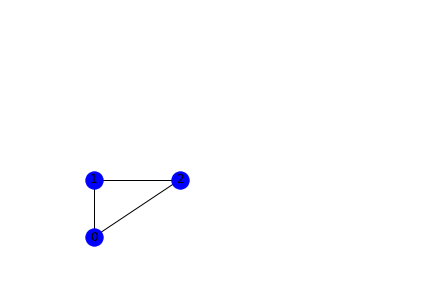

In [54]:
G=nx.Graph()
#for i in range(3):
    #G.add_node(i)
G.add_weighted_edges_from([(0,1,3.0),(1,2,7.5),(0,2,5.5)])#添加边的权值
 
pos = [(1,1),(1,2),(2,2)]#元组中的两个数字是第i（从0开始计数）个点的坐标
 
nx.draw(G,pos,with_labels=True,node_color='b')#按参数构图
 
plt.xlim(0,5)#设置首界面X轴坐标范围
plt.ylim(0,5)#设置首界面Y轴坐标范围
 
plt.show()#显示图像


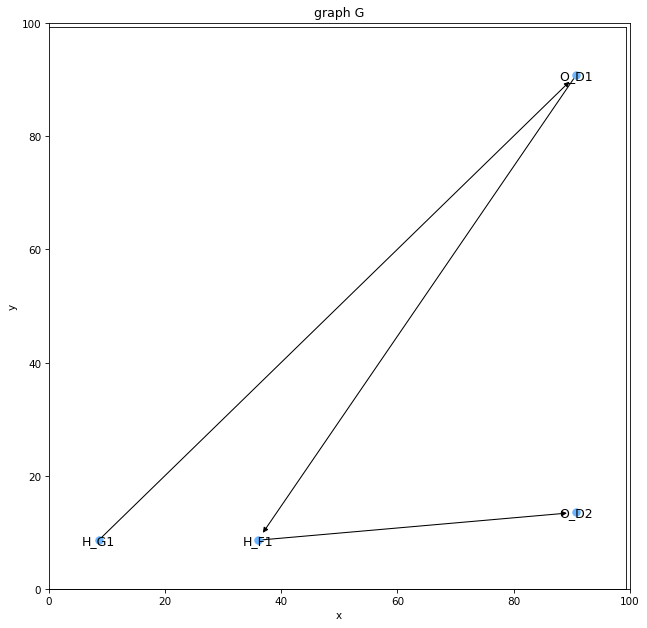

In [10]:
#测试用代码

#点列表
G = nx.MultiDiGraph()
num = 4
nodes = list(range(num))
# 将节点添加到网络中
G.add_nodes_from(nodes)  # 从列表中加点

#边列表
edges = [[0,1], [1,2], [2,3]]
G.add_edges_from(edges)

#标志列表
labels = [ 'H_G1', 'O_D1', 'H_F1', 'O_D2']
nlabels = dict(zip(nodes, labels))

#添加坐标
coordinates = [[0,0],[66,50],[22,0],[66, 3]]
vnode= np.array(coordinates)
npos = dict(zip(nodes, vnode))  # 获取节点与坐标之间的映射关系，用字典表示

 # 若显示多个图，可将所有节点放入该列表中
# pos = {} 
# pos.update(npos)

# 绘制点，标签，边
fig1 = plt.figure(num='fig1', figsize=(10, 10), dpi=75, facecolor='#FFFFFF', edgecolor='#0000FF')
plt.title("graph G")
plt.ylabel("y")
plt.xlabel("x")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.axes([0.125, 0.125, 0.77, 0.75])
nx.draw_networkx_nodes(G, npos, node_size=50, node_color="#6CB6FF")  # 绘制节点
nx.draw_networkx_edges(G, npos, edges)  # 绘制边
nx.draw_networkx_labels(G, npos, nlabels)  # 标签
plt.show()

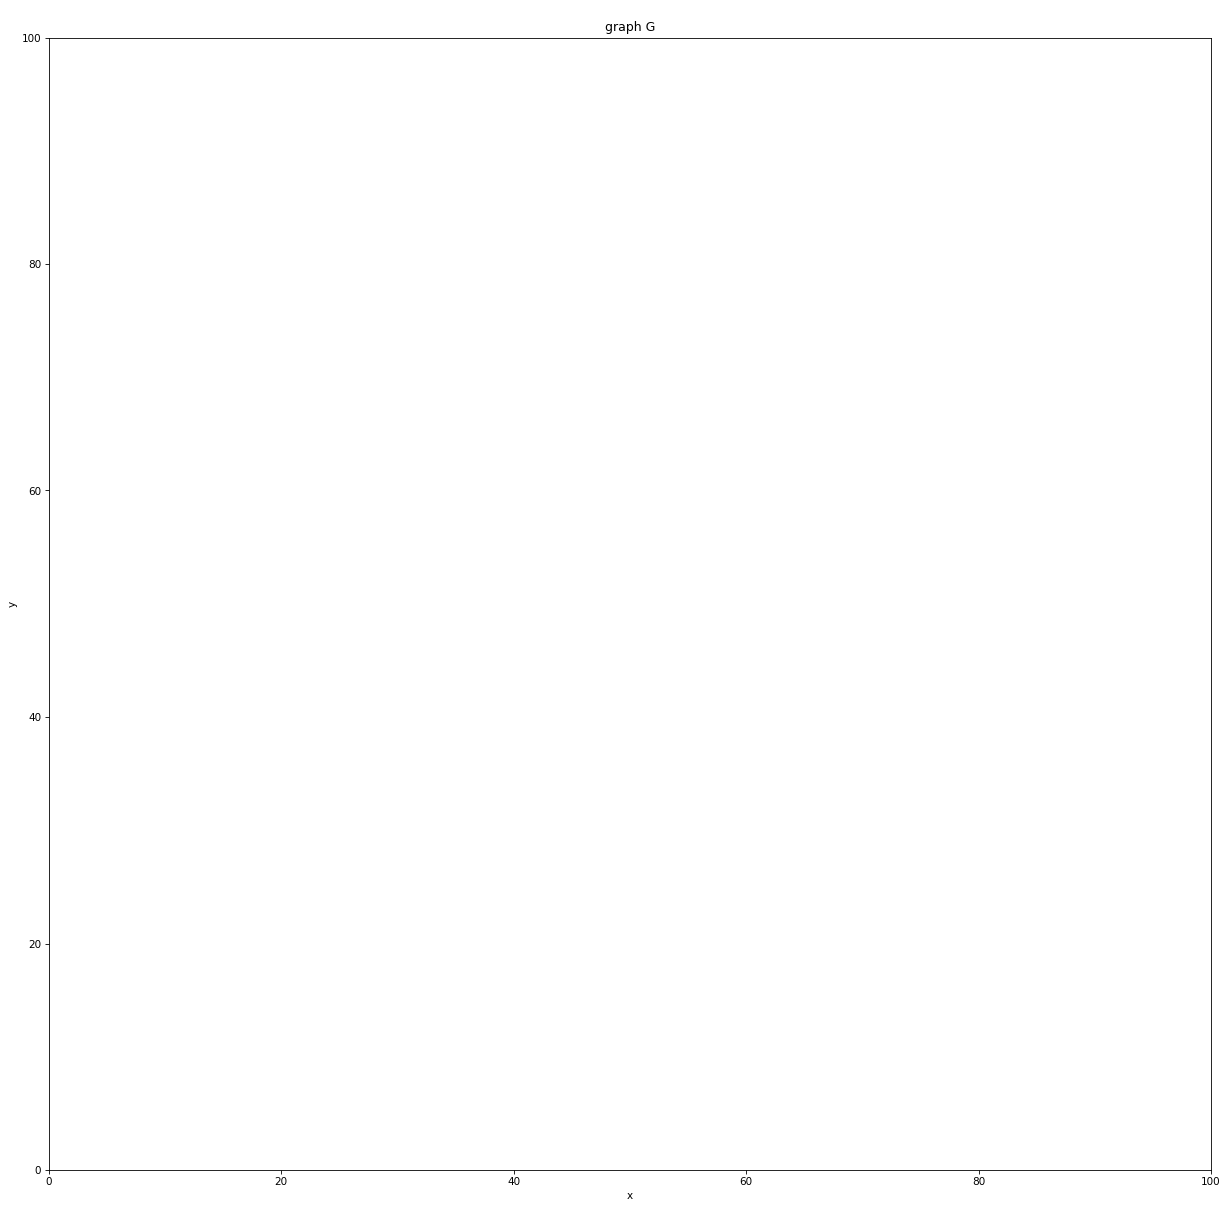

In [38]:
G = nx.MultiDiGraph()
#绘制画布及图
fig1 = plt.figure(num='fig1', figsize=(20, 20), dpi=75, facecolor='#FFFFFF', edgecolor='#0000FF')
plt.title("graph G")
plt.ylabel("y")
plt.xlabel("x")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.axes([0.1, 0.1, 0.8, 0.8])
nx.draw(G,pos = nx.circular_layout(G),with_labels=True,)
plt.show()

# 测试kaggle上的足球场绘制

In [3]:
from matplotlib.patches import Arc, Arrow , Circle , ConnectionPatch , Rectangle
import matplotlib.pyplot as plt

In [4]:
def CreatePitch(ax):
    # boarder line
    # 原始：OuterLine = Rectangle([0,0],width = 120, height = 80, fill = True, color = 'green')
    OuterLine = Rectangle([0,0],width = 120, height = 80, fill = True, color = 'green')

    LeftPenalty = Rectangle([0,19.85],width =16.5 , height = 40.3, fill = False)
    RightPenalty = Rectangle([103.5,19.85],width =16.5 , height =40.3  ,fill = False)
    MidLine = ConnectionPatch([60,0],[60,80],"data","data")
   
    # Mid Circle
    MidCircle = Circle([60,40],9.15,fill = False)
   
    # 6 Yards area
    LeftSix = Rectangle([0,30.85],width = 5.5,height = 18.3,fill = False)
    RightSix = Rectangle([114.5,30.85],width = 5.5,height = 18.3,fill = False)
   
    # Dot near penalty area
    LDot = Circle([11,40],0.8,fill = True,color = 'white')
    RDot = Circle([109,40],0.8,fill = True,color = 'white')
   
    # Goal post
    Lgoal = Rectangle([0,36.35],width = 2.3 , height = 7.3 ,
                      angle = 360 , fill = True, color = 'white')
    Rgoal = Rectangle([117.5,36.35],width = 2.3 , height = 7.3 ,
                      angle = 360 ,fill = True, color = 'white')
    
    # Arcs
    leftArc = Arc((11,40),height=18,width=20,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((109,40),height=16,width=20,angle=0,theta1=130,theta2=230,color="black")
   
    # mid point
    MidPoint = Circle([60,40], 0.8,fill = True,color = 'white')
    objects = [OuterLine,LeftPenalty,RightPenalty,MidLine,MidCircle,LeftSix,
               RightSix, MidPoint,LDot,RDot,Lgoal,Rgoal,leftArc,rightArc]

    for i in objects:
        ax.add_patch(i)
'''
    for i,j in zip(pe,ps):
        ax.annotate("", xy = (i[0],i[1]),xycoords = "data",
                    xytext = (j[0],j[1]),textcoords = 'data',
                   arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "black"))
    for i,j in zip(se,ss):
        ax.annotate("",xy = (i[0],i[1]),xytext = (j[0],j[1]),textcoords = 'data',
                    arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))
'''
       

'\n    for i,j in zip(pe,ps):\n        ax.annotate("", xy = (i[0],i[1]),xycoords = "data",\n                    xytext = (j[0],j[1]),textcoords = \'data\',\n                   arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "black"))\n    for i,j in zip(se,ss):\n        ax.annotate("",xy = (i[0],i[1]),xytext = (j[0],j[1]),textcoords = \'data\',\n                    arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))\n'

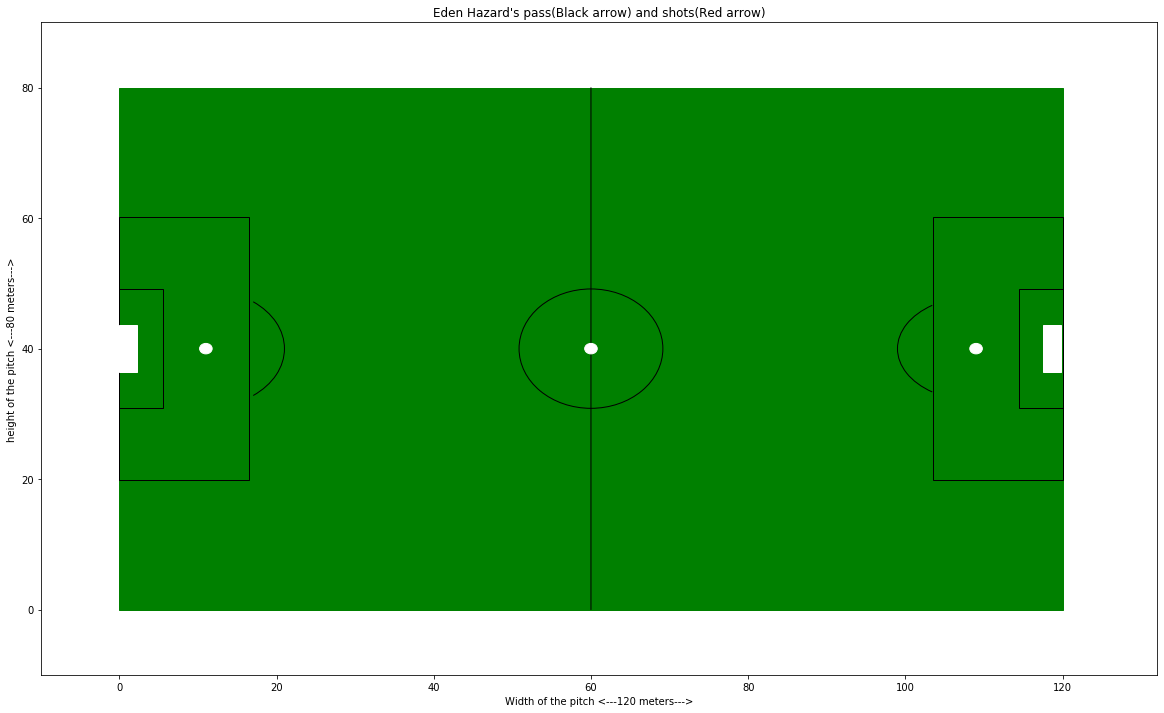

In [18]:
fig=plt.figure(figsize = (20,12)) 
ax=fig.add_subplot(1,1,1)
CreatePitch(ax) #overlay our different objects on the pitch
plt.ylim(-10, 90)
plt.xlim(-10, 132)
plt.xlabel("Width of the pitch <---120 meters--->", color = 'black')
plt.ylabel("height of the pitch <---80 meters--->", color = 'black')
plt.title("Eden Hazard's pass(Black arrow) and shots(Red arrow)")
plt.show()

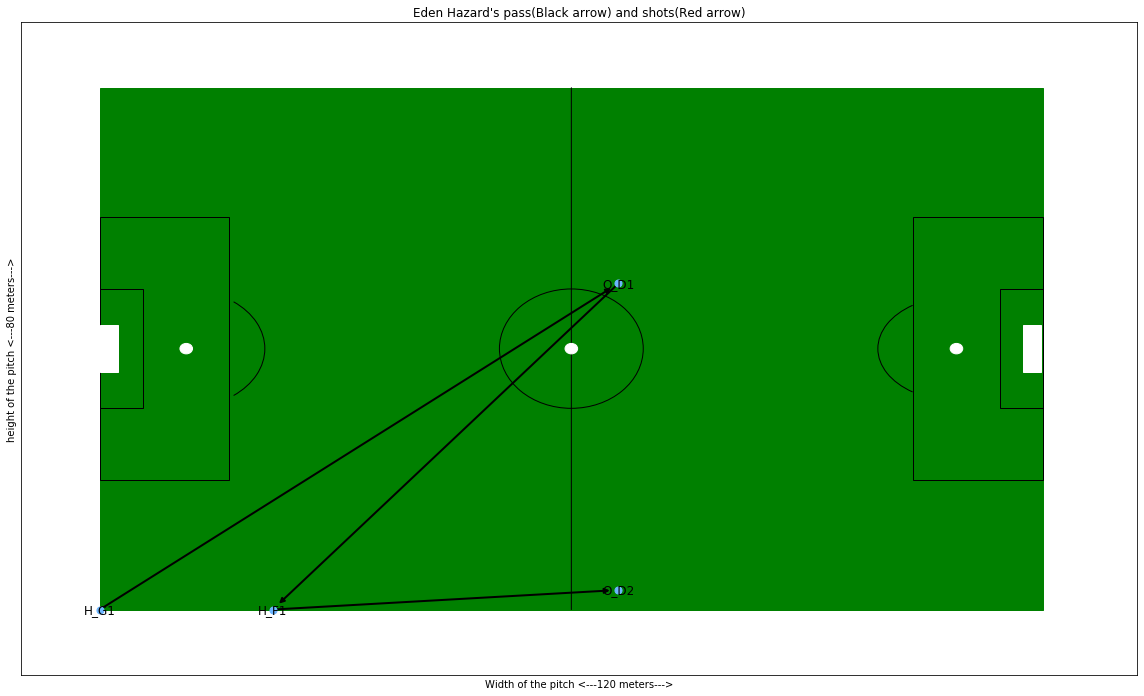

In [22]:
fig=plt.figure(figsize = (20,12)) 
ax=fig.add_subplot(1,1,1)
CreatePitch(ax) #overlay our different objects on the pitch
plt.ylim(-10, 90)
plt.xlim(-10, 132)
plt.xlabel("Width of the pitch <---120 meters--->", color = 'black')
plt.ylabel("height of the pitch <---80 meters--->", color = 'black')
plt.title("Huskie's pass(Black arrow) and shots(Red arrow)")

nx.draw_networkx_nodes(G, npos, node_size=50, node_color="#6CB6FF",width = 2)  # 绘制节点
nx.draw_networkx_edges(G, npos, edges, width=2)  # 绘制边
nx.draw_networkx_labels(G, npos, nlabels)  # 标签

plt.show()